In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Data_Iot/iot-eda-boyolali.xlsx')

In [ ]:
df

,BOYOLALI,datakecepatanangin,datasuhuudara,datakelembabanudara,dataphtanah,datakelembabantanah,datasuhutanah,Harga Bawang Boyolali
0,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,32000
2,2022-12-03,NaN,NaN,NaN,NaN,NaN,NaN,32500
3,2022-12-04,NaN,NaN,NaN,NaN,NaN,NaN,32500
4,2022-12-05,NaN,NaN,NaN,NaN,NaN,NaN,33000
...,...,...,...,...,...,...,...,...
85,2023-02-24,NaN,NaN,NaN,NaN,NaN,NaN,28000
86,2023-02-25,NaN,NaN,NaN,NaN,NaN,NaN,28000
87,2023-02-26,NaN,NaN,NaN,NaN,NaN,NaN,28000
88,2023-02-27,NaN,NaN,NaN,NaN,NaN,NaN,28000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   BOYOLALI               90 non-null     datetime64[ns]
 1   datakecepatanangin     58 non-null     float64       
 2   datasuhuudara          58 non-null     float64       
 3   datakelembabanudara    58 non-null     float64       
 4   dataphtanah            58 non-null     float64       
 5   datakelembabantanah    58 non-null     float64       
 6   datasuhutanah          58 non-null     float64       
 7   Harga Bawang Boyolali  90 non-null     int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 5.8 KB


### Drop Boyolali Date Column

In [ ]:
df.drop(['BOYOLALI'], axis=1, inplace=True)

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline

In [ ]:
df.describe()

,datakecepatanangin,datasuhuudara,datakelembabanudara,dataphtanah,datakelembabantanah,datasuhutanah,Harga Bawang Boyolali
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,90.000000
mean,27.199184,24.056728,81.738643,5.462026,50.126447,22.458582,35052.777778
std,14.092232,5.600201,9.457658,0.907487,8.104980,6.147654,4409.911978
min,14.695122,15.000000,73.895349,4.262500,43.687500,12.056872,27000.000000
25%,15.250753,20.202830,74.688679,4.545455,44.051213,21.311379,32000.000000
50%,25.209190,21.524207,76.653019,5.060797,46.536335,22.816038,34000.000000
75%,31.469340,32.042135,91.126953,6.225067,61.973131,28.974725,40000.000000
max,84.060976,33.141026,97.393365,8.000000,63.188235,29.927711,45000.000000


### Fill missing value with NaN

In [ ]:
df.loc[df["datakecepatanangin"] == 0.0, "datakecepatanangin"] = np.NAN
df.loc[df["datasuhuudara"] == 0.0, "datasuhuudara"] = np.NAN
df.loc[df["datakelembabanudara"] == 0.0, "datakelembabanudara"] = np.NAN
df.loc[df["dataphtanah"] == 0.0, "dataphtanah"] = np.NAN
df.loc[df["datakelembabantanah"] == 0.0, "datakelembabantanah"] = np.NAN
df.loc[df["datasuhutanah"] == 0.0, "datasuhutanah"] = np.NAN

df.isnull().sum()[1:6]

datasuhuudara          32
datakelembabanudara    32
dataphtanah            32
datakelembabantanah    32
datasuhutanah          32
dtype: int64

### Check missing value

<Axes: >

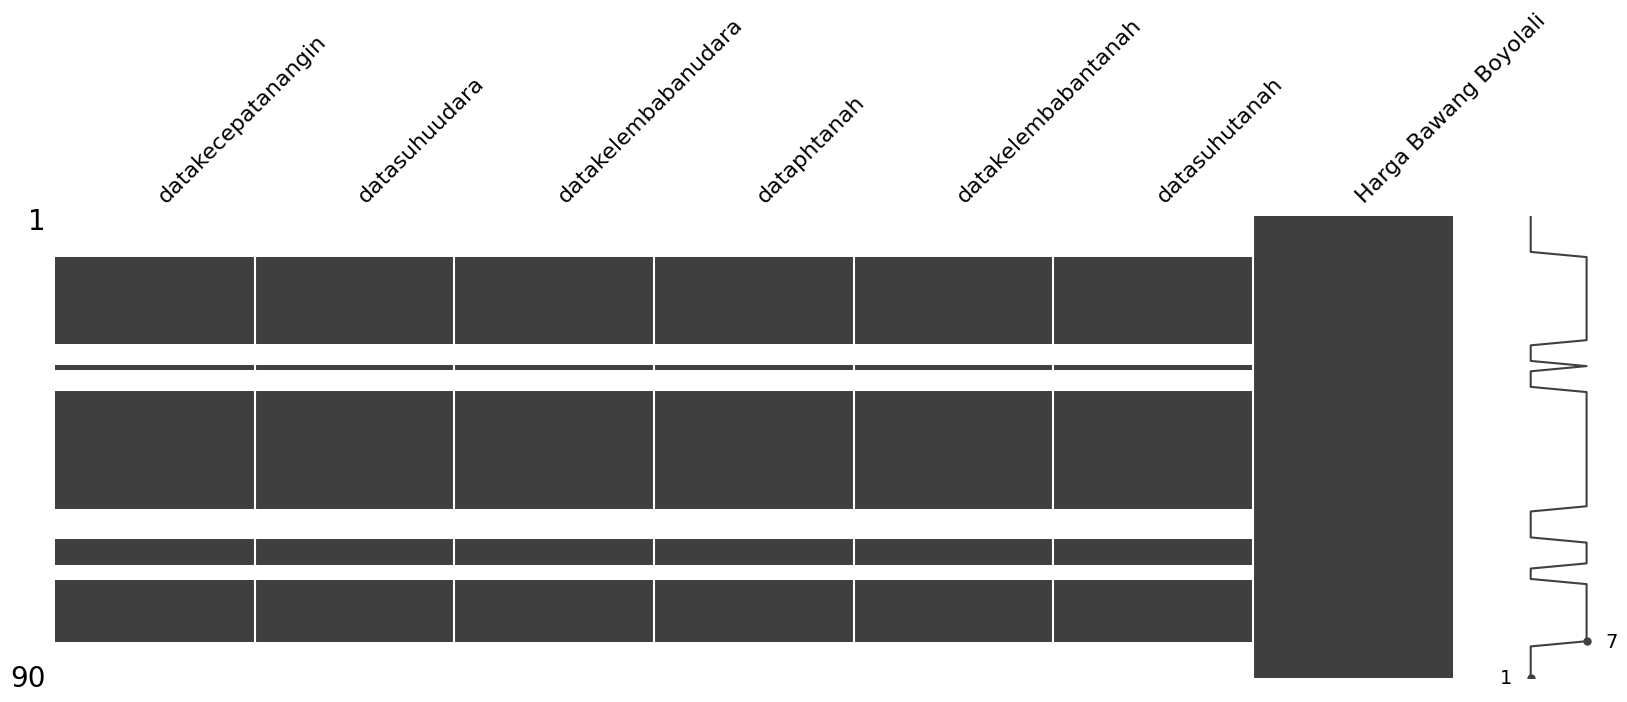

In [ ]:
mno.matrix(df, figsize = (20, 6))

### Create array to hold the collumn

In [ ]:
missing_columns = ['datakecepatanangin', 'datasuhuudara', 'datakelembabanudara', 'dataphtanah', 'datakelembabantanah', 'datasuhutanah']

### Create Imputation Function

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)

    return df

In [ ]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

### Deterministic Regression Imputation

In Deterministic Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

In [ ]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:

    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

### Check missing value & Output

<Axes: >

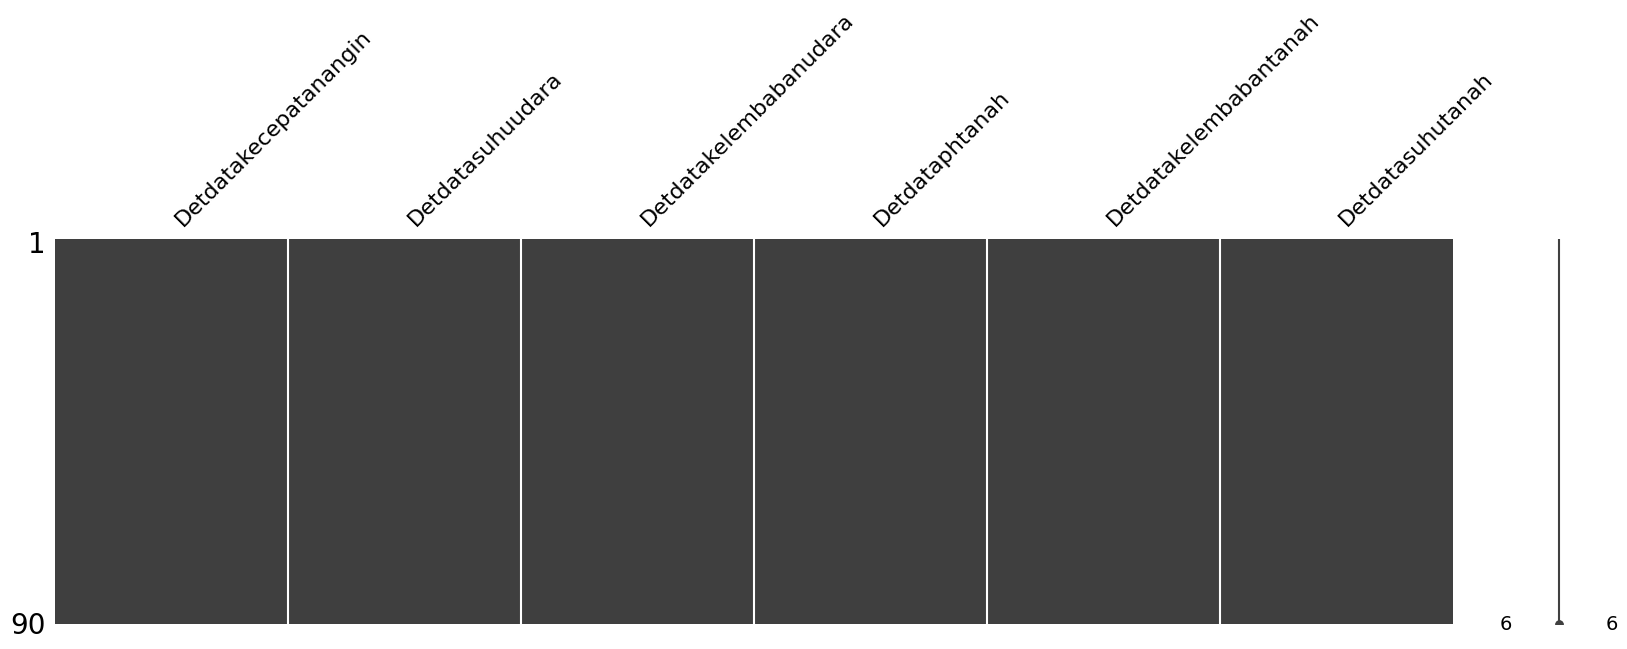

In [ ]:
mno.matrix(deter_data, figsize = (20,5))

In [ ]:
deter_data['Detdatakecepatanangin'][0:30]

0     21.784230
1     35.705697
2     21.546543
3     28.944481
4     26.946949
5     21.465945
6     22.893072
7     22.179889
8     15.048780
9     15.193182
10    14.849462
11    14.695122
12    15.253012
13    14.880000
14    15.176471
15    15.111111
16    15.094118
17    14.806818
18    14.862500
19    15.250000
20    14.895349
21    14.988764
22    15.246753
23    15.371795
24    15.025641
25    26.902146
26    26.948863
27    30.223375
28    25.407983
29    24.000000
Name: Detdatakecepatanangin, dtype: float64

A major disadvantage in this method is that we reduce the inherent variability in the imputed variable. In other words, since we substitute the missing data with regression outputs, the predicted values lie along the regression hyperplane where the variable would have actually contained some noise/bias.

We can visualize the above fact in a number of ways. First one is plotting histograms for both the incomplete data and the complete data in which we can observe that the plot of the completed data is taller and narrower when compared to that of the incomplete data. In other words, the complete data has a lesser standard deviation (thus lesser variability) than the incomplete data.

Another method would be plotting a boxplot in which we can observe that the IQ Range is pretty compressed for the complete data when compared to that in the incomplete data

### Stochastic Regression Imputation

To add uncertainity back to the imputed variable values, we can add some normally distributed noise with a mean of zero and the variance equal to the standard error of regression estimates . This method is called as Random Imputation or Stochastic Regression Imputation

In [ ]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:

    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()

    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = df[feature].shape[0],
                                      loc = predict,
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) &
                                                                            (random_predict > 0)]

When we introduce this Gaussian noise we may end up imputing some negative values for the missing data due to the spread of the distibution for a particular pair of mean and standard deviation. But, as per our discussion earlier, there might be some variable whose values can never be zero. For example, kecepatan angin, suhu udara and kelembaban udara.

We can avoid this situation by retaining the values introduced by simple random imputation which is discussed above. This apparently reduces the variability that we introduce, but it's something we have to deal with, especially in case of these variables whose values are restricted to ceratin parts of the real number line.

<ipython-input-23-ea276f889ce9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
<ipython-input-23-ea276f889ce9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red

IndexError: ignored

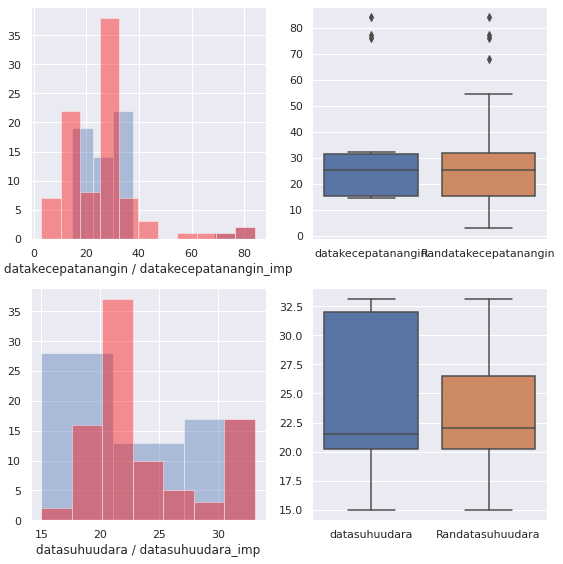

In [ ]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(['datakecepatanangin', 'datasuhuudara', 'datakelembabanudara', 'dataphtanah', 'datakelembabantanah', 'datasuhutanah']):
    sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')

    sns.boxplot(data = pd.concat([df[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])

    plt.tight_layout()

In [ ]:
pd.concat([df[['datakecepatanangin', 'datasuhuudara', 'datakelembabanudara', 'dataphtanah', 'datakelembabantanah', 'datasuhutanah']], random_data[['Randatakecepatanangin', 'Randatasuhuudara', 'Randatakelembabanudara', 'Randataphtanah', 'Randatakelembabantanah', 'Randatasuhutanah']]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
datakecepatanangin,58.0,27.199184,14.092232,14.695122,15.250753,25.209190,31.469340,84.060976
datasuhuudara,58.0,24.056728,5.600201,15.000000,20.202830,21.524207,32.042135,33.141026
datakelembabanudara,58.0,81.738643,9.457658,73.895349,74.688679,76.653019,91.126953,97.393365
dataphtanah,58.0,5.462026,0.907487,4.262500,4.545455,5.060797,6.225067,8.000000
datakelembabantanah,58.0,50.126447,8.104980,43.687500,44.051213,46.536335,61.973131,63.188235
datasuhutanah,58.0,22.458582,6.147654,12.056872,21.311379,22.816038,28.974725,29.927711
Randatakecepatanangin,90.0,26.633731,14.556700,2.953687,15.206575,25.193627,31.830863,84.060976
Randatasuhuudara,90.0,23.829259,4.828625,15.000000,20.231806,21.995261,26.497979,33.141026
Randatakelembabanudara,90.0,81.609834,9.314871,69.327384,74.634771,77.801136,88.536123,108.945374
Randataphtanah,90.0,5.496310,0.873472,4.098449,4.859885,5.291465,6.225067,8.000000


Note :
- ada nilai kelembaban udara > 100, perlu analisa lebih lanjut apakah masih memungkinkan kelembaban udara diatas nilai 100.

In [ ]:
random_data['Randatakecepatanangin'][0:30]

0      4.013126
1     41.073710
2     25.216044
3     11.300780
4     54.732103
5      2.953687
6      4.740886
7     14.880000
8     15.048780
9     15.193182
10    14.849462
11    14.695122
12    15.253012
13    14.880000
14    15.176471
15    15.111111
16    15.094118
17    14.806818
18    14.862500
19    15.250000
20    14.895349
21    14.988764
22    15.246753
23    15.371795
24    15.025641
25    37.935060
26    32.588047
27     3.835521
28    21.141397
29    24.000000
Name: Randatakecepatanangin, dtype: float64

### Download files

In [ ]:
#download file csv
deter_data.to_excel("iot_boyolali.xlsx", index=False)

#library untuk download file
from google.colab import files
files.download("iot_boyolali.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>